## Problem 1.
Using a watershed segmentation, try to segment the image of a brain into the three major tissue types (skin [bright], Cerebal Spinal fluid [dark], and brain).  You will most likely want to use a combination of steps to first segment the whole head from the back ground and then segment the tissue into types.  

Comment out the arrows/text (they are just to show you the tissue types).  Work in gray scale.

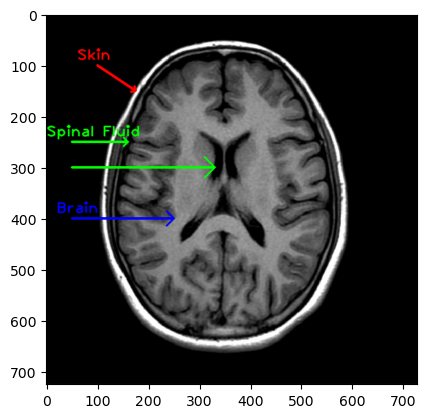

In [35]:
import cv2
import os
import matplotlib.pyplot as plt
img = cv2.imread(os.path.relpath('data/MRI_brain.png'))

cv2.arrowedLine(img, (100, 100), (175,150),(255,0,0), 3)
cv2.putText(img, "Skin", (60,90),cv2.FONT_HERSHEY_PLAIN,2,(255,0,0),2,cv2.LINE_AA)

cv2.arrowedLine(img, (50, 250), (160,250),(0,255,0), 3)
cv2.arrowedLine(img, (50, 300), (330,300),(0,255,0), 3)
cv2.putText(img, "Spinal Fluid", (0,240),cv2.FONT_HERSHEY_PLAIN,2,(0,255,0),2,cv2.LINE_AA)

cv2.arrowedLine(img, (50, 400), (250,400),(0,0,255), 3)
cv2.putText(img, "Brain", (20,390),cv2.FONT_HERSHEY_PLAIN,2,(0,0,255),2,cv2.LINE_AA)


plt.imshow(img,cmap='gray')

## Problem 2.
Digital segmentation methods have been widely used in medical pathology to automate methods that used to be done by hand.  One example of this is counting the number of cells in an image.  In this problem, you will use the image of red blood cells.  Design a segmentation approach similar to the demo using contours to attempt to count the number of cells in the image.    


Image credit ShutterStock

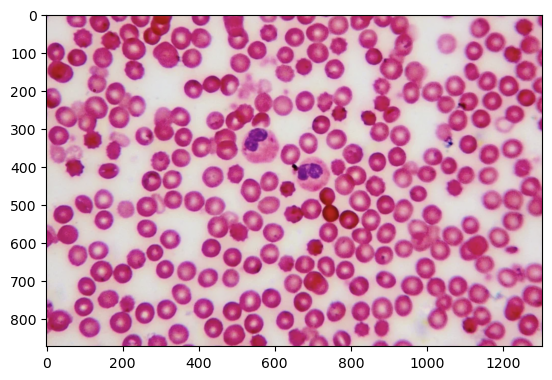

In [37]:
import cv2
import os
import matplotlib.pyplot as plt
img = cv2.imread(os.path.relpath('data/CellCounting.png'))
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img)

## Problem 3
Use the K-means segmetation method based on RGB colors to try to seperate the CitySkyline image into several components.  Play around with the number of clusters and show at least three images with different parameters.


Image source: https://pxhere.com/en/photo/705594 (Image of Minneapolis, MN)


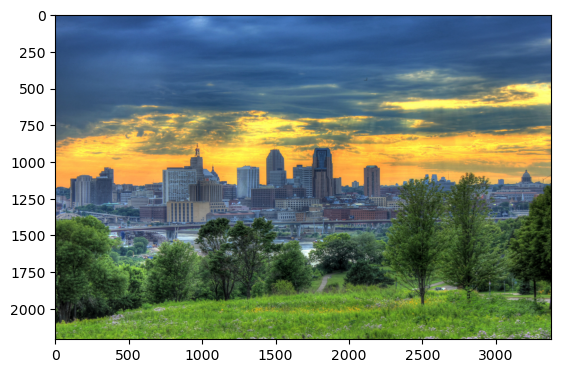

In [39]:
import cv2
import os
import matplotlib.pyplot as plt
img = cv2.imread(os.path.relpath('data/CitySkyline.jpg'))
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img)

## Problem 4
Following the example from class of using the openCV BackgroundSubtractor modules with video 
from a web camera, implement a similar while-loop to grab video frames and apply the background subtraction  method to 
mask the video.

* Demonstrate the use of the three versions of this method in openCV    

*       cv2.createBackgroundSubtractorMOG()
*       cv2.createBackgroundSubtractorMOG2()
*       cv2.createBackgroundSubtractorGMG()

For ECE2390 students

* Examine how at least two of the parameters (such as number of gaussian clusters or the 'history' parameter ).  
Note your observations in comments in the code.

